### 과제1
콘크리트 강도를 예측하는 의사결정나무 모델을 만들고 predict method를 이용하여 예측값을 구하라.

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

matplotlib.rc('font', family = 'Malgun Gothic')

In [60]:
df = pd.read_csv('Concrete.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [61]:
# 콘크리트 강도 변수인 strength를 목적변수로 설정한다

df_y = df['strength']
df_x = df.drop('strength', axis=1, inplace=False)

In [62]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.4, random_state = 1234)
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

# 학습데이터에는 0.996, 테스트 데이터에는 0.790의 설명력을 보임, 설명력이 다소 높은 것을 알 수 있음

Score on training set : 0.996
Score on test set : 0.790


In [63]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

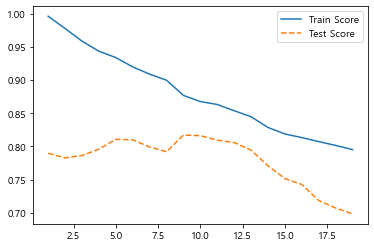

In [64]:
df_score_leaf.round(3)
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()

# 모델 설명력 그래프 결과, 테스트 데이터의 성능과 학습 데이터의 성능 저하를 최소화하는 9를 잎사귀 노드 수로 결정

In [65]:
train_score = []; test_score = []
para_split = [n_split * 1 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 9, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

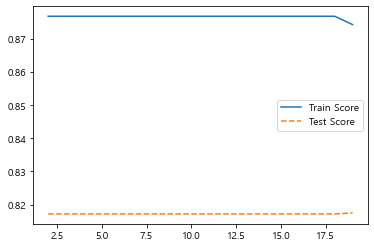

In [66]:
df_score_split.round(3)
plt.plot(para_split, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.legend()

# 분리 노드의 최소 자료 수는 16으로 설정

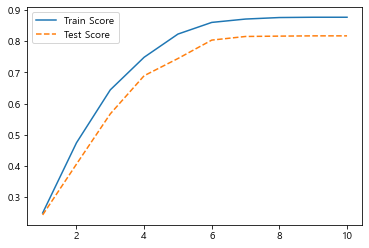

In [67]:
train_score = []; test_score = []
para_depth = [n_depth * 1 for n_depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 9, min_samples_split=16, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesdepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)
plt.plot(para_depth, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.legend()

# 깊이가 늘어남에 따라 학습데이터, 테스트 데이터 성능이 증가하므로, depth를 10으로 설정

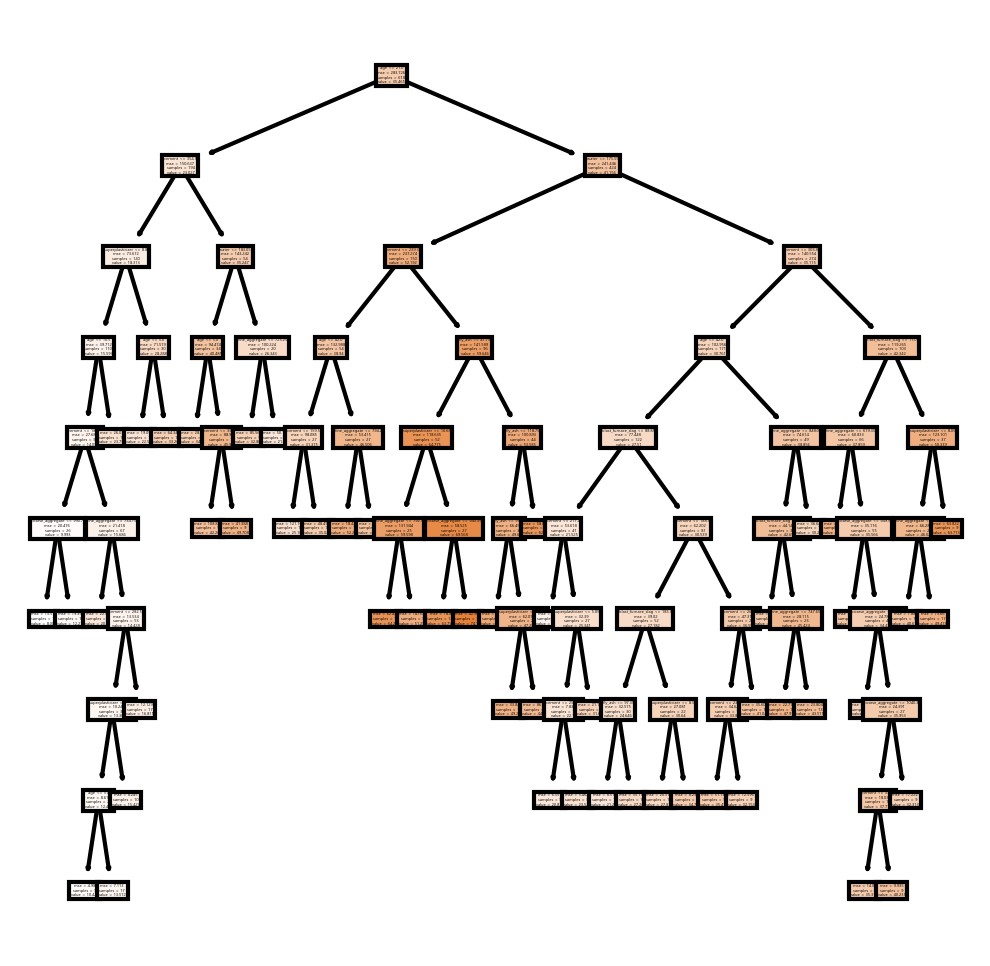

In [68]:
tree_final = DecisionTreeRegressor(random_state=1234,  min_samples_leaf=9, min_samples_split=16, max_depth = 10)
tree_final.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

Text(0, 0.5, '변수')

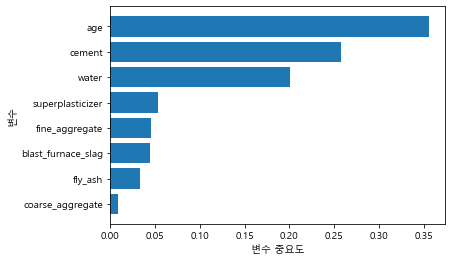

In [41]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

변수 중요도 출력 결과, age, cement, water 변수가 높은 변수 중요도를 가진 것으로 확인되었다.
콘크리트 강도에 age, cement, water 순으로 영향을 주는 것을 알 수 있다.

In [42]:
print('Score on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Score on training set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on training set : 0.877
Score on training set : 0.817


콘크리트 강도를 예측하는 의사결정나무 모델 결과, 학습데이터에는 0.877, 테스트 데이터에는 0.817의  
설명력을 나타냈다. 두 데이터셋에 대해 모두 높은 설명력을 보이므로, 해당 모델이 콘크리트 강도  
예측에 유의미한 모델이라고 할 수 있다.

### 과제2
콘크리트 강도를 예측하는 랜덤 포레스트 모델을 만들고 predict method를 이용하여 예측값을 구하라.  
(랜덤포레스트)

In [43]:
# 앞서 데이터 분할 과정을 이어받아 랜덤포레스트 모델 구현

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.980
Score on test set : 0.904


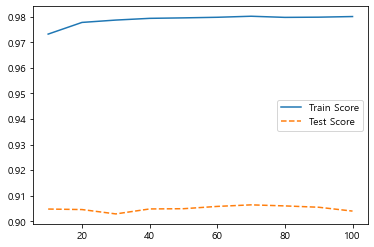

In [46]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

df_score_n.round(3)
plt.plot(para_n_tree, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.legend()

# n_estimators가 40 이상일 경우, 뚜렷한 변화폭이 나타나지 않으므로 n_estimators를 40으로 설정 

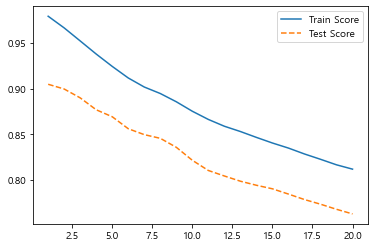

In [50]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 40, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_n.round(3)
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()

# 잎사귀 노드의 최소 자료 수가 커질수록 성능이 저하되므로 2.5로 설정

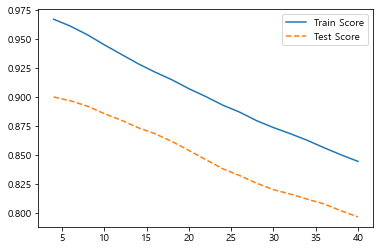

In [53]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf=2, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score


df_score_split.round(3)
plt.plot(para_split, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.legend()

# 분리 노드의 최소 자료 수가 커질수록 성능이 저하되므로 5로 설정

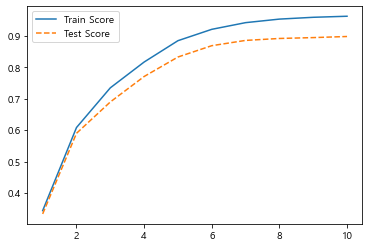

In [55]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 40, min_samples_leaf=2, min_samples_split = 5, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)
plt.plot(para_depth, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.legend()

# 최대 깊이의 경우, 커질수록 성능이 좋아지므로 10으로 설정

In [56]:
# 앞선 하이퍼 파라미터 설정에 따른 최종 랜덤포레스트 모델 구현

rf_final = RandomForestRegressor(random_state = 1234, n_estimators = 40, min_samples_leaf=2, min_samples_split = 5, max_depth = 10)

rf_final.fit(df_train_x, df_train_y)
print('Score on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.963
Score on test set : 0.898


앞선 하이퍼 파라미터 설정에 기반해 최종 모델을 도출한 결과, 학습 데이터와 테스트 데이터에 대한 설명력은  
각각 0.963, 0.898이 나왔다. 과제1의 의사결정나무 보다 더 높은 설명력을 보이며, 콘크리트 강도 예측에  매우 유의미한 모델이라고 생각된다.

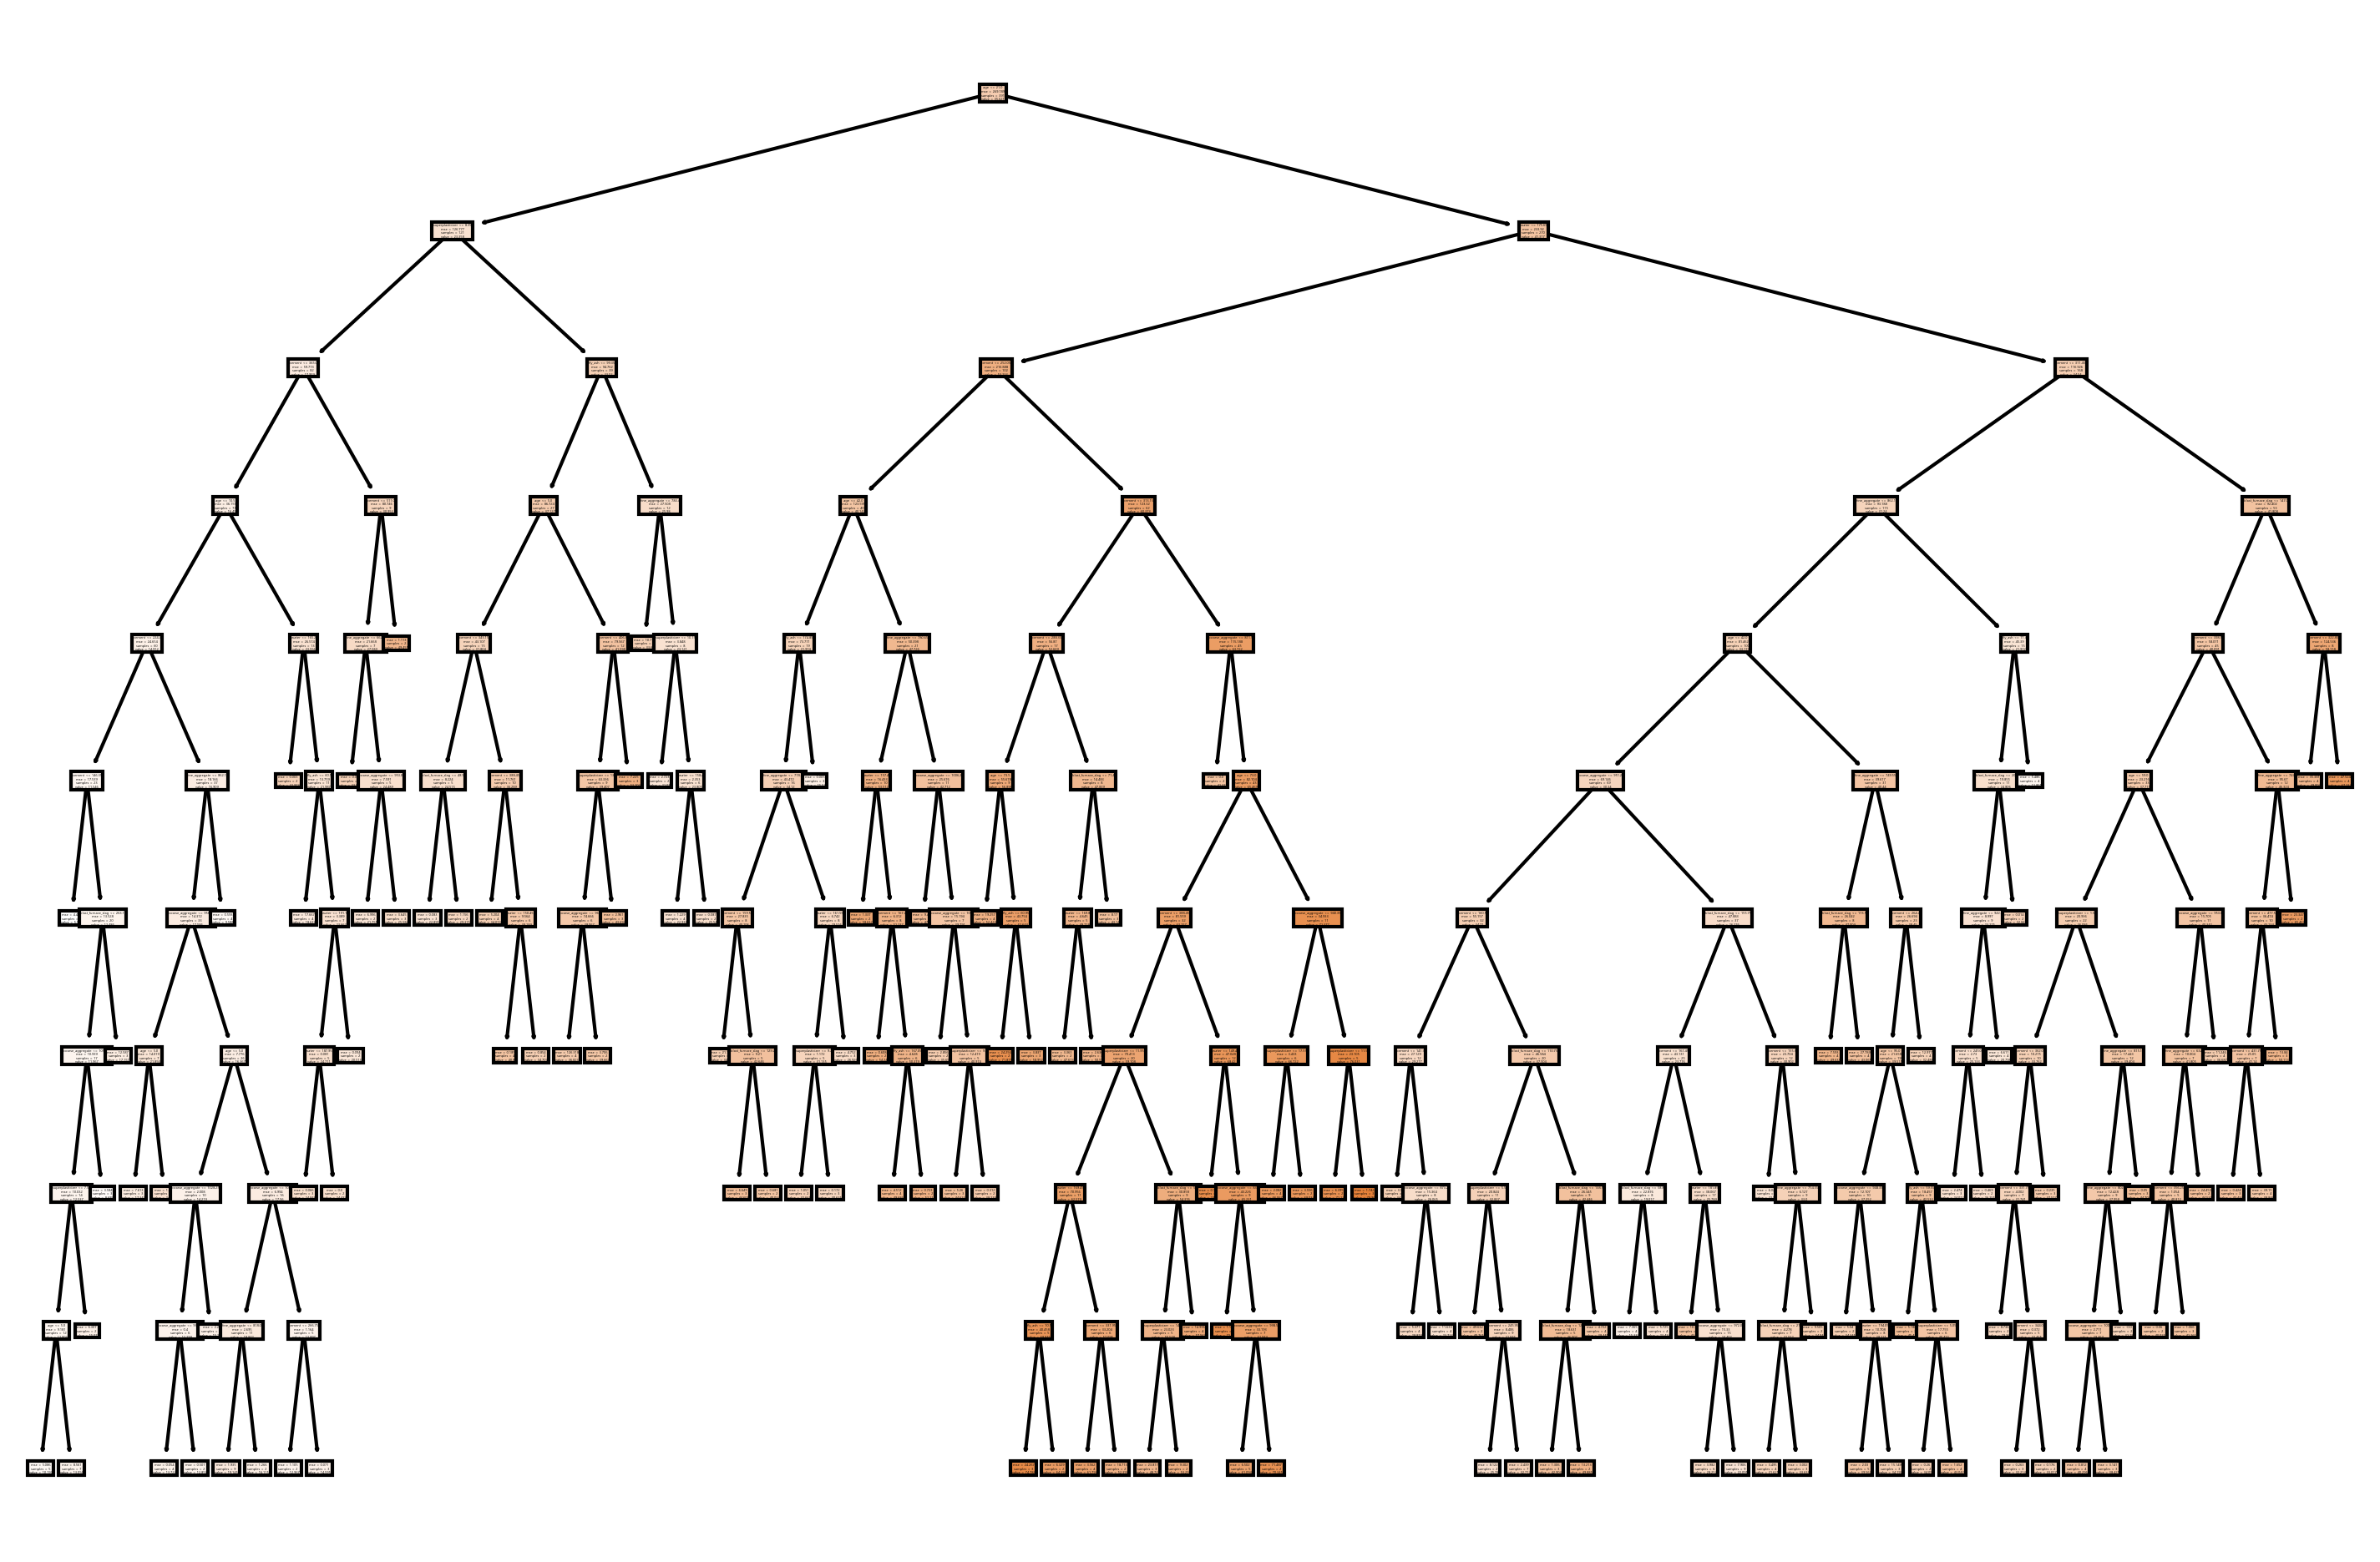

In [57]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[0], feature_names = v_feature_name, filled = True);

Text(0, 0.5, '변수')

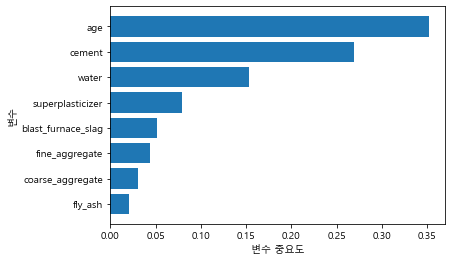

In [58]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

마지막으로 변수 중요도를 보면, 의사결정나무와 마찬가지로 age, cement, water 변수가 높은 중요도를 갖고  
있음을 알 수 있다. 다만, 의사결정나무보다 superplasticizer의 변수 중요도가 다소 높아졌음을 알 수 있다.